In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = (20,10)


In [ ]:
df = pd.read_csv('/content/Cardiotocographic.csv')
df

LB        AC        FM        UC        DL   DS   DP  ASTV  \
0     120.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  73.0   
1     132.000000  0.006380  0.000000  0.006380  0.003190  0.0  0.0  17.0   
2     133.000000  0.003322  0.000000  0.008306  0.003322  0.0  0.0  16.0   
3     134.000000  0.002561  0.000000  0.007742  0.002561  0.0  0.0  16.0   
4     131.948232  0.006515  0.000000  0.008143  0.000000  0.0  0.0  16.0   
...          ...       ...       ...       ...       ...  ...  ...   ...   
2121  140.000000  0.000000  0.961268  0.007426  0.000000  0.0  0.0  79.0   
2122  140.000000  0.000775  0.000000  0.006979  0.000000  0.0  0.0  78.0   
2123  140.000000  0.000980  0.000000  0.006863  0.000000  0.0  0.0  79.0   
2124  140.000000  0.000679  0.000000  0.006110  0.000000  0.0  0.0  78.0   
2125  142.000000  0.001616 -0.000188  0.008078  0.000000  0.0  0.0  74.0   

      MSTV       ALTV  MLTV  Width  Tendency       NSP  
0      0.5  43.000000   2.4   64.0  0.999926  2.000000  
1      2.1   0.000000  10.4  130.0  0.000000  1.000000  
2      2.1   0.000000  13.4  130.0  0.000000  1.000000  
3      2.4   0.000000  23.0  117.0  1.000000  1.000000  
4      2.4   0.000000  19.9  117.0  1.000000  1.000000  
...    ...        ...   ...    ...       ...       ...  
2121   0.2  25.000000   7.2   40.0  0.000000  2.000000  
2122   0.4  22.000000   7.1   66.0  1.000000  2.000000  
2123   0.4  20.000000   6.1   67.0  1.000000  1.990464  
2124   0.4  27.000000   7.0   66.0  1.000000  2.000000  
2125   0.4  35.857183   5.0   42.0  0.000000  1.000000  

[2126 rows x 14 columns]

In [ ]:
df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [ ]:
df = df.fillna(df.mean())

In [ ]:
df.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   float64
 1   AC        2126 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2126 non-null   float64
 6   DP        2126 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2126 non-null   float64
 11  Width     2126 non-null   float64
 12  Tendency  2126 non-null   float64
 13  NSP       2126 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [ ]:
df.astype(int)

LB  AC  FM  UC  DL  DS  DP  ASTV  MSTV  ALTV  MLTV  Width  Tendency  \
0     120   0   0   0   0   0   0    73     0    43     2     64         0   
1     132   0   0   0   0   0   0    17     2     0    10    130         0   
2     133   0   0   0   0   0   0    16     2     0    13    130         0   
3     134   0   0   0   0   0   0    16     2     0    23    117         1   
4     131   0   0   0   0   0   0    16     2     0    19    117         1   
...   ...  ..  ..  ..  ..  ..  ..   ...   ...   ...   ...    ...       ...   
2121  140   0   0   0   0   0   0    79     0    25     7     40         0   
2122  140   0   0   0   0   0   0    78     0    22     7     66         1   
2123  140   0   0   0   0   0   0    79     0    20     6     67         1   
2124  140   0   0   0   0   0   0    78     0    27     7     66         1   
2125  142   0   0   0   0   0   0    74     0    35     5     42         0   

      NSP  
0       2  
1       1  
2       1  
3       1  
4       1  
...   ...  
2121    2  
2122    2  
2123    1  
2124    2  
2125    1  

[2126 rows x 14 columns]

In [ ]:
df.dtypes

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

**Detecting Outliers**:

Outliers are observations that significantly deviate from the rest of the data.            
 Common methods for outlier detection include:
Visual inspection using box plots, histograms, or scatter plots.
Statistical methods such as z-score, modified z-score, or Tukey's method based on the interquartile range (IQR).

**Treating Outliers:**

Once outliers are detected, you can choose from various strategies to treat them, including:

Winsorization: Replace outliers with the nearest non-outlying value.

Trimming: Remove outliers from the dataset.

Transformation: Apply mathematical transformations such as logarithm or square root to make the distribution more symmetric.

In [ ]:
df.describe()

LB           AC           FM           UC           DL  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean    133.343598     0.003219     0.009894     0.004391     0.001895   
std      11.214328     0.004370     0.067540     0.003340     0.003343   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     126.000000     0.000000     0.000000     0.001851     0.000000   
50%     133.000000     0.001668     0.000000     0.004484     0.000000   
75%     140.000000     0.005606     0.002567     0.006536     0.003289   
max     214.000000     0.038567     0.961268     0.030002     0.030769   

                DS           DP         ASTV         MSTV         ALTV  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean      0.000003     0.000175    46.995984     1.364378    10.285964   
std       0.000141     0.000836    18.813973     1.173632    21.205041   
min      -0.001353    -0.005348   -63.000000    -6.600000   -91.000000   
25%       0.000000     0.000000    32.000000     0.700000     0.000000   
50%       0.000000     0.000000    49.000000     1.200000     0.000000   
75%       0.000000     0.000000    61.000000     1.700000    11.000000   
max       0.002706     0.010695   162.000000    13.800000   182.000000   

              MLTV        Width     Tendency          NSP  
count  2126.000000  2126.000000  2126.000000  2126.000000  
mean      8.284887    70.429260     0.316371     1.304507  
std       7.734356    42.719161     0.642424     0.641426  
min     -50.700000  -174.000000    -3.000000    -1.025988  
25%       4.600000    37.000000     0.000000     1.000000  
50%       7.500000    68.000000     0.000000     1.000000  
75%      10.800000   100.000000     1.000000     1.000000  
max     101.400000   357.000000     3.000000     5.000000

In [ ]:
df.mean()

LB          133.343598
AC            0.003219
FM            0.009894
UC            0.004391
DL            0.001895
DS            0.000003
DP            0.000175
ASTV         46.995984
MSTV          1.364378
ALTV         10.285964
MLTV          8.284887
Width        70.429260
Tendency      0.316371
NSP           1.304507
dtype: float64

In [ ]:
df.median()

LB          133.000000
AC            0.001668
FM            0.000000
UC            0.004484
DL            0.000000
DS            0.000000
DP            0.000000
ASTV         49.000000
MSTV          1.200000
ALTV          0.000000
MLTV          7.500000
Width        68.000000
Tendency      0.000000
NSP           1.000000
dtype: float64

In [ ]:
df.std()

LB          11.214328
AC           0.004370
FM           0.067540
UC           0.003340
DL           0.003343
DS           0.000141
DP           0.000836
ASTV        18.813973
MSTV         1.173632
ALTV        21.205041
MLTV         7.734356
Width       42.719161
Tendency     0.642424
NSP          0.641426
dtype: float64

In [ ]:
interquarile = df.quantile(0.75) - df.quantile(0.25)

**Variable LB (Fetal Heart Rate Baseline):**

The mean and median are close, indicating a symmetric distribution.
The standard deviation is relatively low, suggesting that the data points are clustered around the mean.
The interquartile range (IQR) is relatively narrow, indicating that most data points fall within a narrow range around the median.

**Variable AC (Acceleration):**

There is a considerable variation in the data, as indicated by the high standard deviation.
The median is significantly lower than the mean, suggesting a right-skewed distribution where there may be some outliers on the higher end.

**Variable FM (Fetal Movement):**

The data seems to be consistently zero in this variable, which might suggest a lack of variability or range in fetal movement across the observations.
Variable MSTV (Mean Value of Short Term Variability):
There is a wide range of variability in this variable, as indicated by the high standard deviation and interquartile range.

**Variable NSP (Fetal State Class):**

This variable represents the classification of fetal state. The majority of the observations fall into class 3 (Normal), with some variability present as indicated by the standard deviation and interquartile range.

<Axes: >

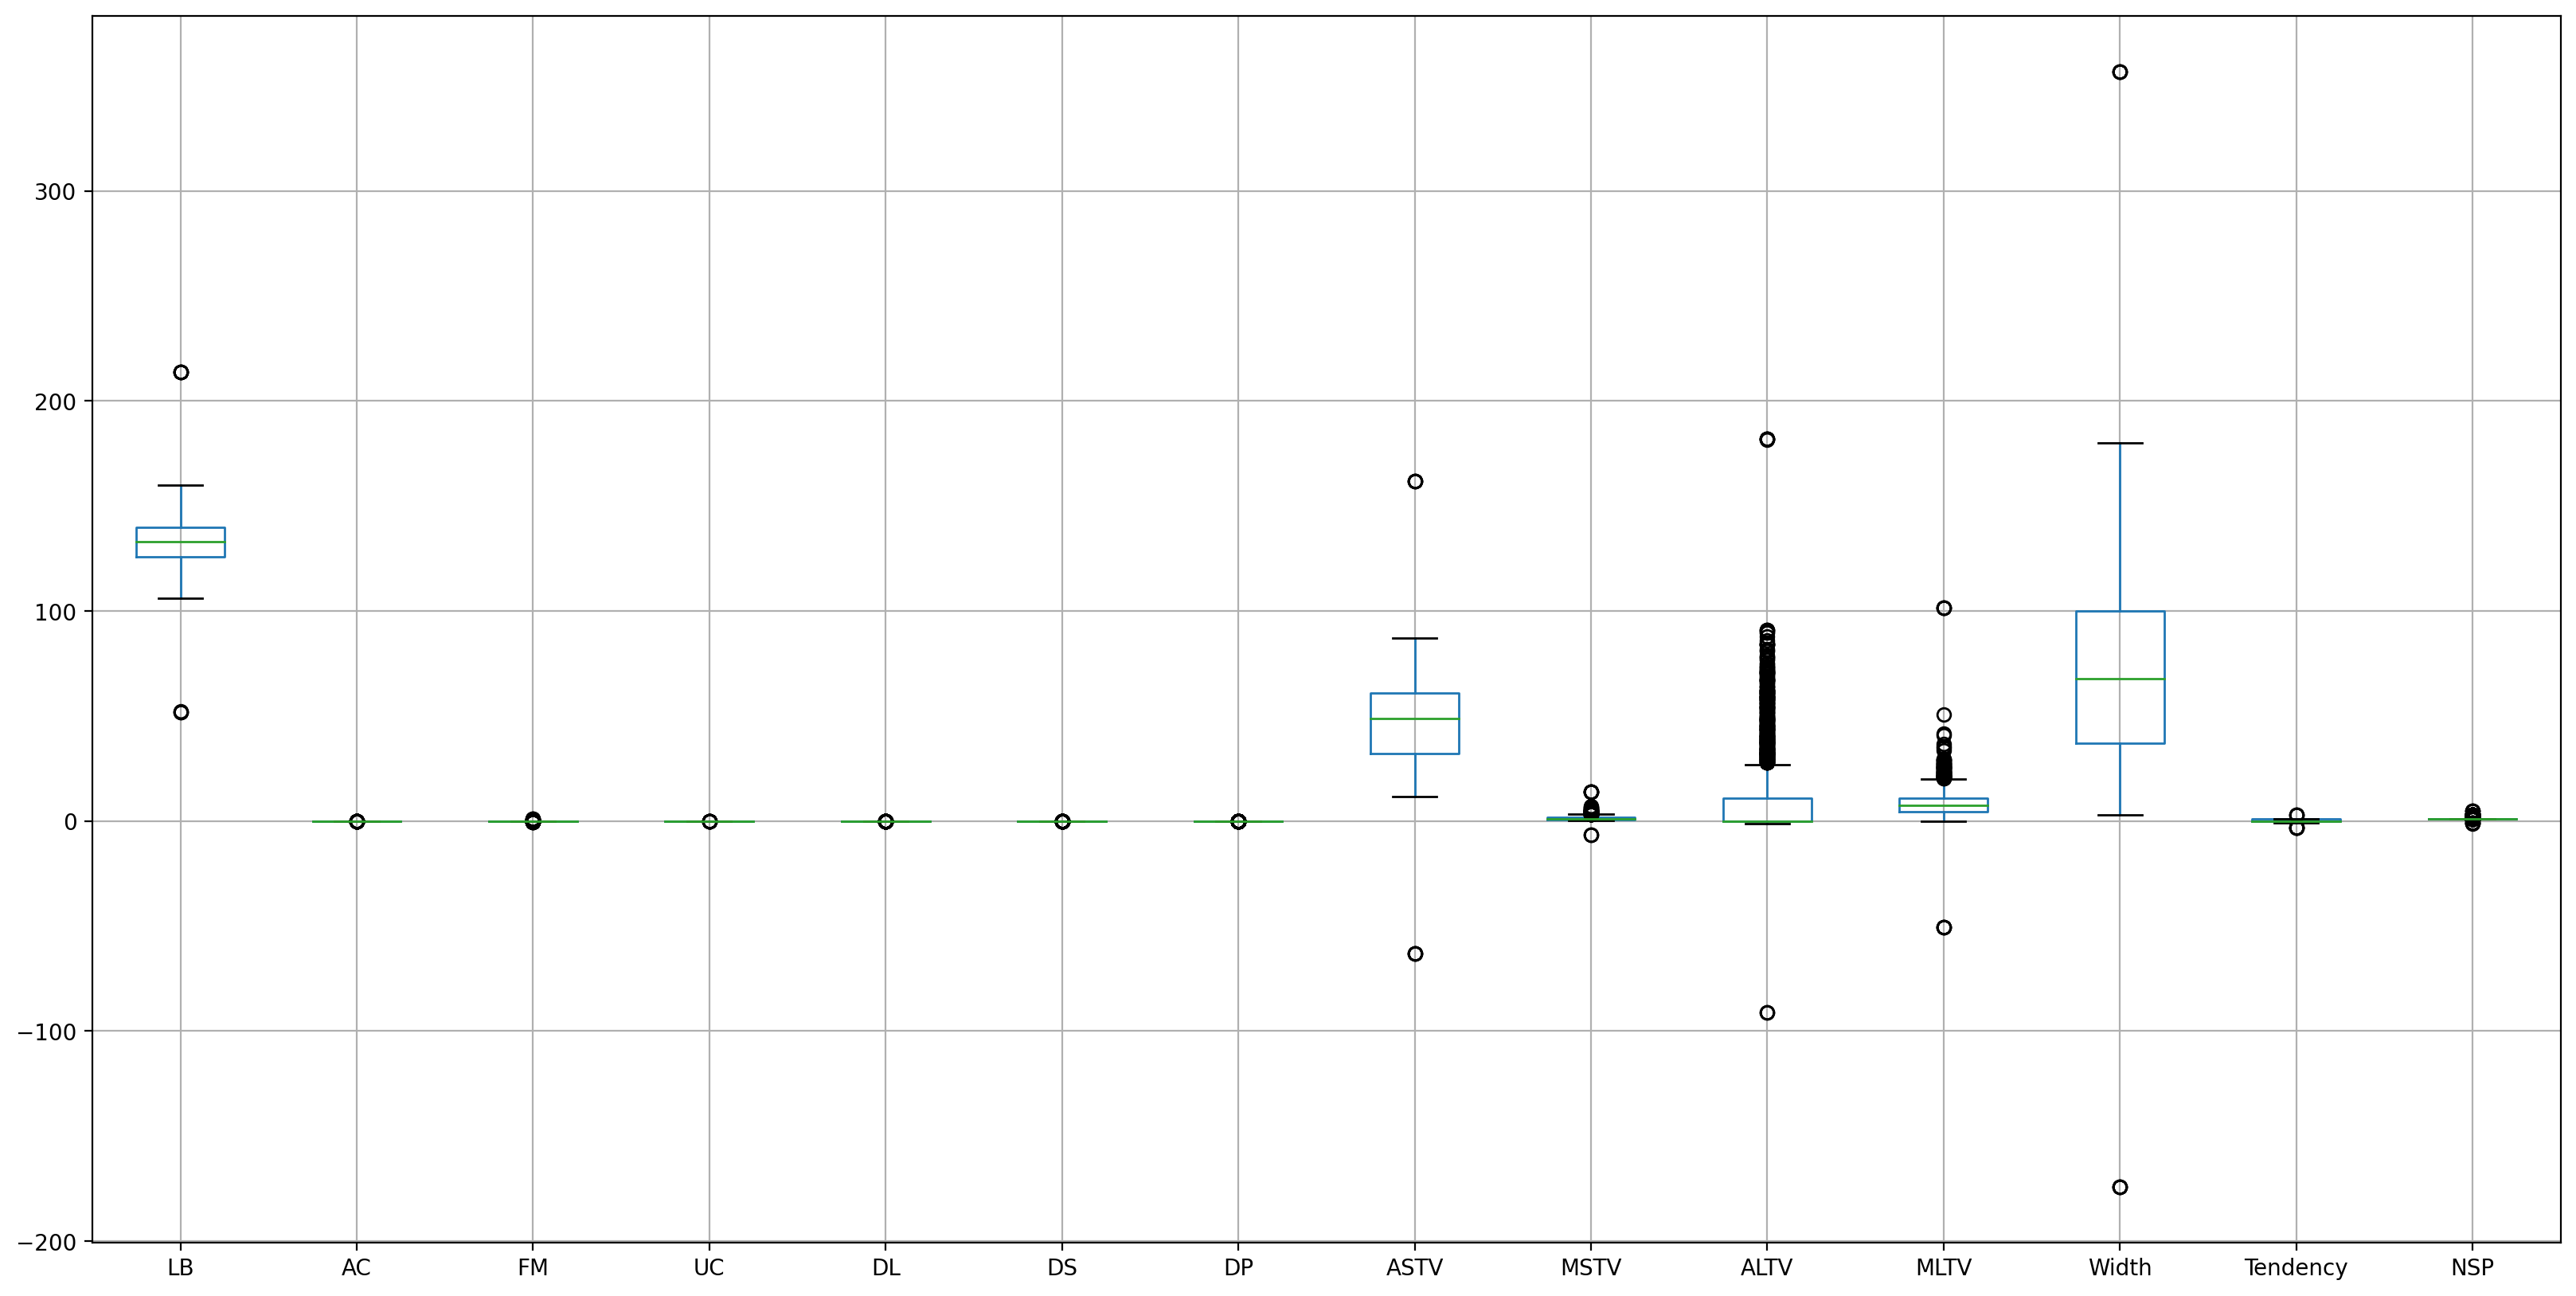

In [ ]:
df.boxplot()

array([[<Axes: title={'center': 'LB'}>, <Axes: title={'center': 'AC'}>,
        <Axes: title={'center': 'FM'}>, <Axes: title={'center': 'UC'}>],
       [<Axes: title={'center': 'DL'}>, <Axes: title={'center': 'DS'}>,
        <Axes: title={'center': 'DP'}>, <Axes: title={'center': 'ASTV'}>],
       [<Axes: title={'center': 'MSTV'}>,
        <Axes: title={'center': 'ALTV'}>,
        <Axes: title={'center': 'MLTV'}>,
        <Axes: title={'center': 'Width'}>],
       [<Axes: title={'center': 'Tendency'}>,
        <Axes: title={'center': 'NSP'}>, <Axes: >, <Axes: >]],
      dtype=object)

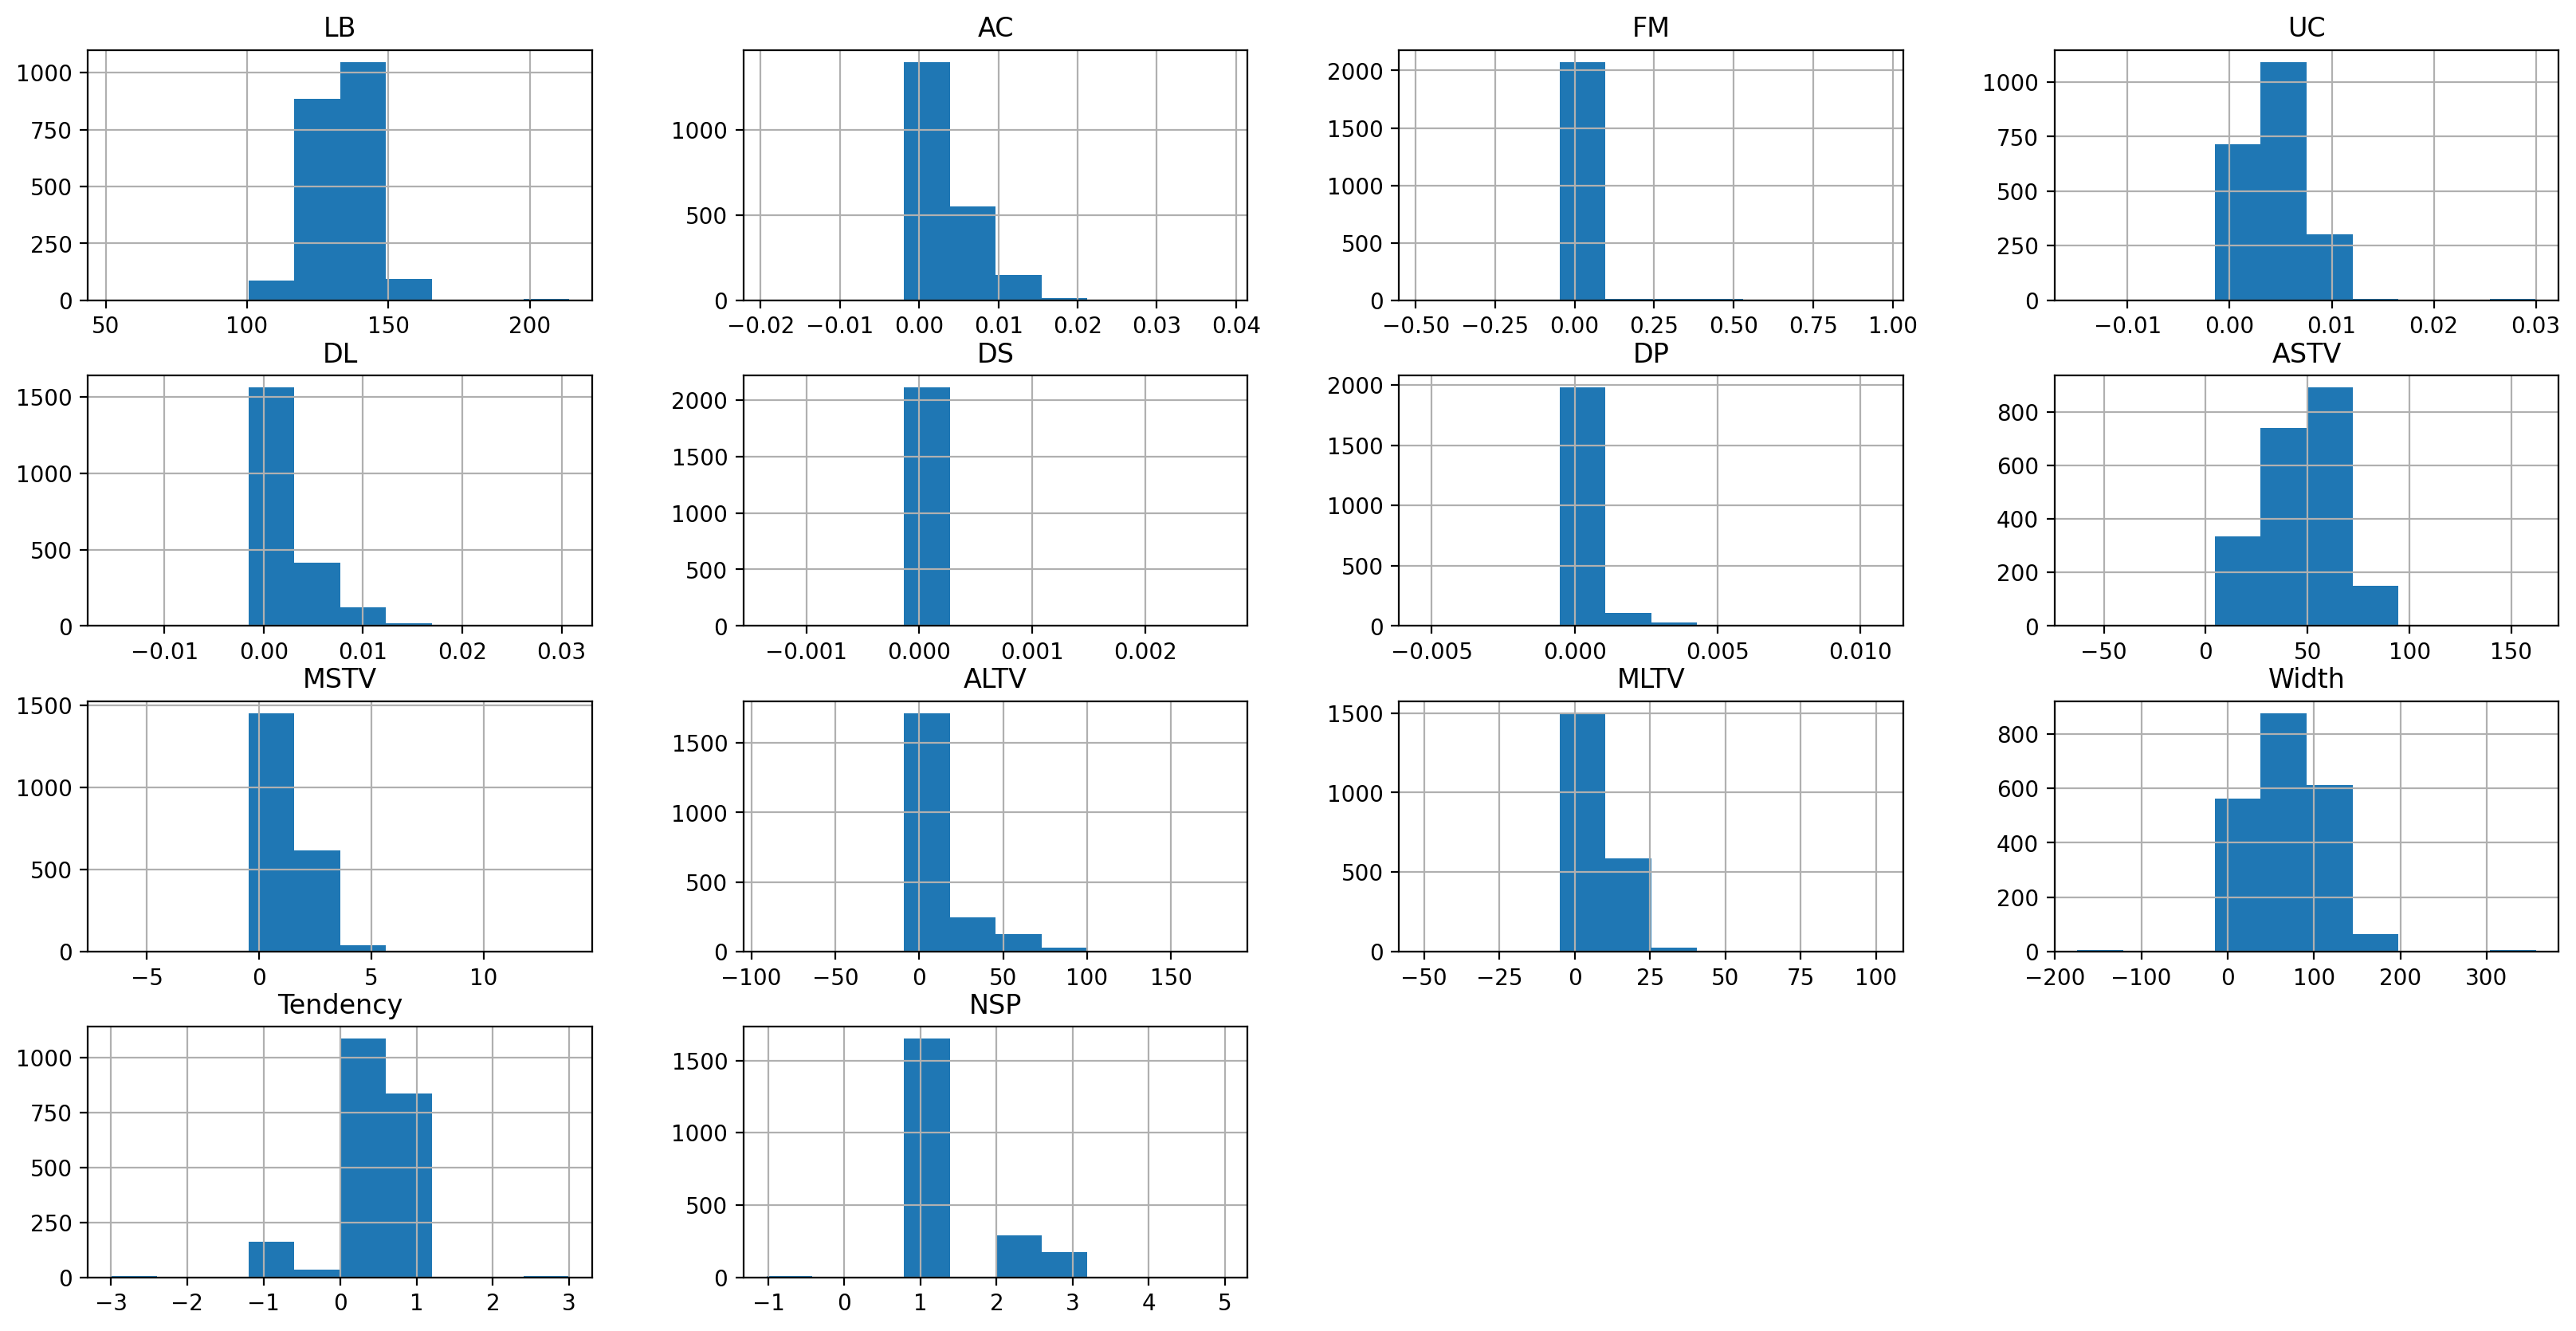

In [ ]:
df.hist()

In [ ]:
df

LB        AC        FM        UC        DL   DS   DP  ASTV  \
0     120.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  73.0   
1     132.000000  0.006380  0.000000  0.006380  0.003190  0.0  0.0  17.0   
2     133.000000  0.003322  0.000000  0.008306  0.003322  0.0  0.0  16.0   
3     134.000000  0.002561  0.000000  0.007742  0.002561  0.0  0.0  16.0   
4     131.948232  0.006515  0.000000  0.008143  0.000000  0.0  0.0  16.0   
...          ...       ...       ...       ...       ...  ...  ...   ...   
2121  140.000000  0.000000  0.961268  0.007426  0.000000  0.0  0.0  79.0   
2122  140.000000  0.000775  0.000000  0.006979  0.000000  0.0  0.0  78.0   
2123  140.000000  0.000980  0.000000  0.006863  0.000000  0.0  0.0  79.0   
2124  140.000000  0.000679  0.000000  0.006110  0.000000  0.0  0.0  78.0   
2125  142.000000  0.001616 -0.000188  0.008078  0.000000  0.0  0.0  74.0   

      MSTV       ALTV  MLTV  Width  Tendency       NSP  
0      0.5  43.000000   2.4   64.0  0.999926  2.000000  
1      2.1   0.000000  10.4  130.0  0.000000  1.000000  
2      2.1   0.000000  13.4  130.0  0.000000  1.000000  
3      2.4   0.000000  23.0  117.0  1.000000  1.000000  
4      2.4   0.000000  19.9  117.0  1.000000  1.000000  
...    ...        ...   ...    ...       ...       ...  
2121   0.2  25.000000   7.2   40.0  0.000000  2.000000  
2122   0.4  22.000000   7.1   66.0  1.000000  2.000000  
2123   0.4  20.000000   6.1   67.0  1.000000  1.990464  
2124   0.4  27.000000   7.0   66.0  1.000000  2.000000  
2125   0.4  35.857183   5.0   42.0  0.000000  1.000000  

[2126 rows x 14 columns]

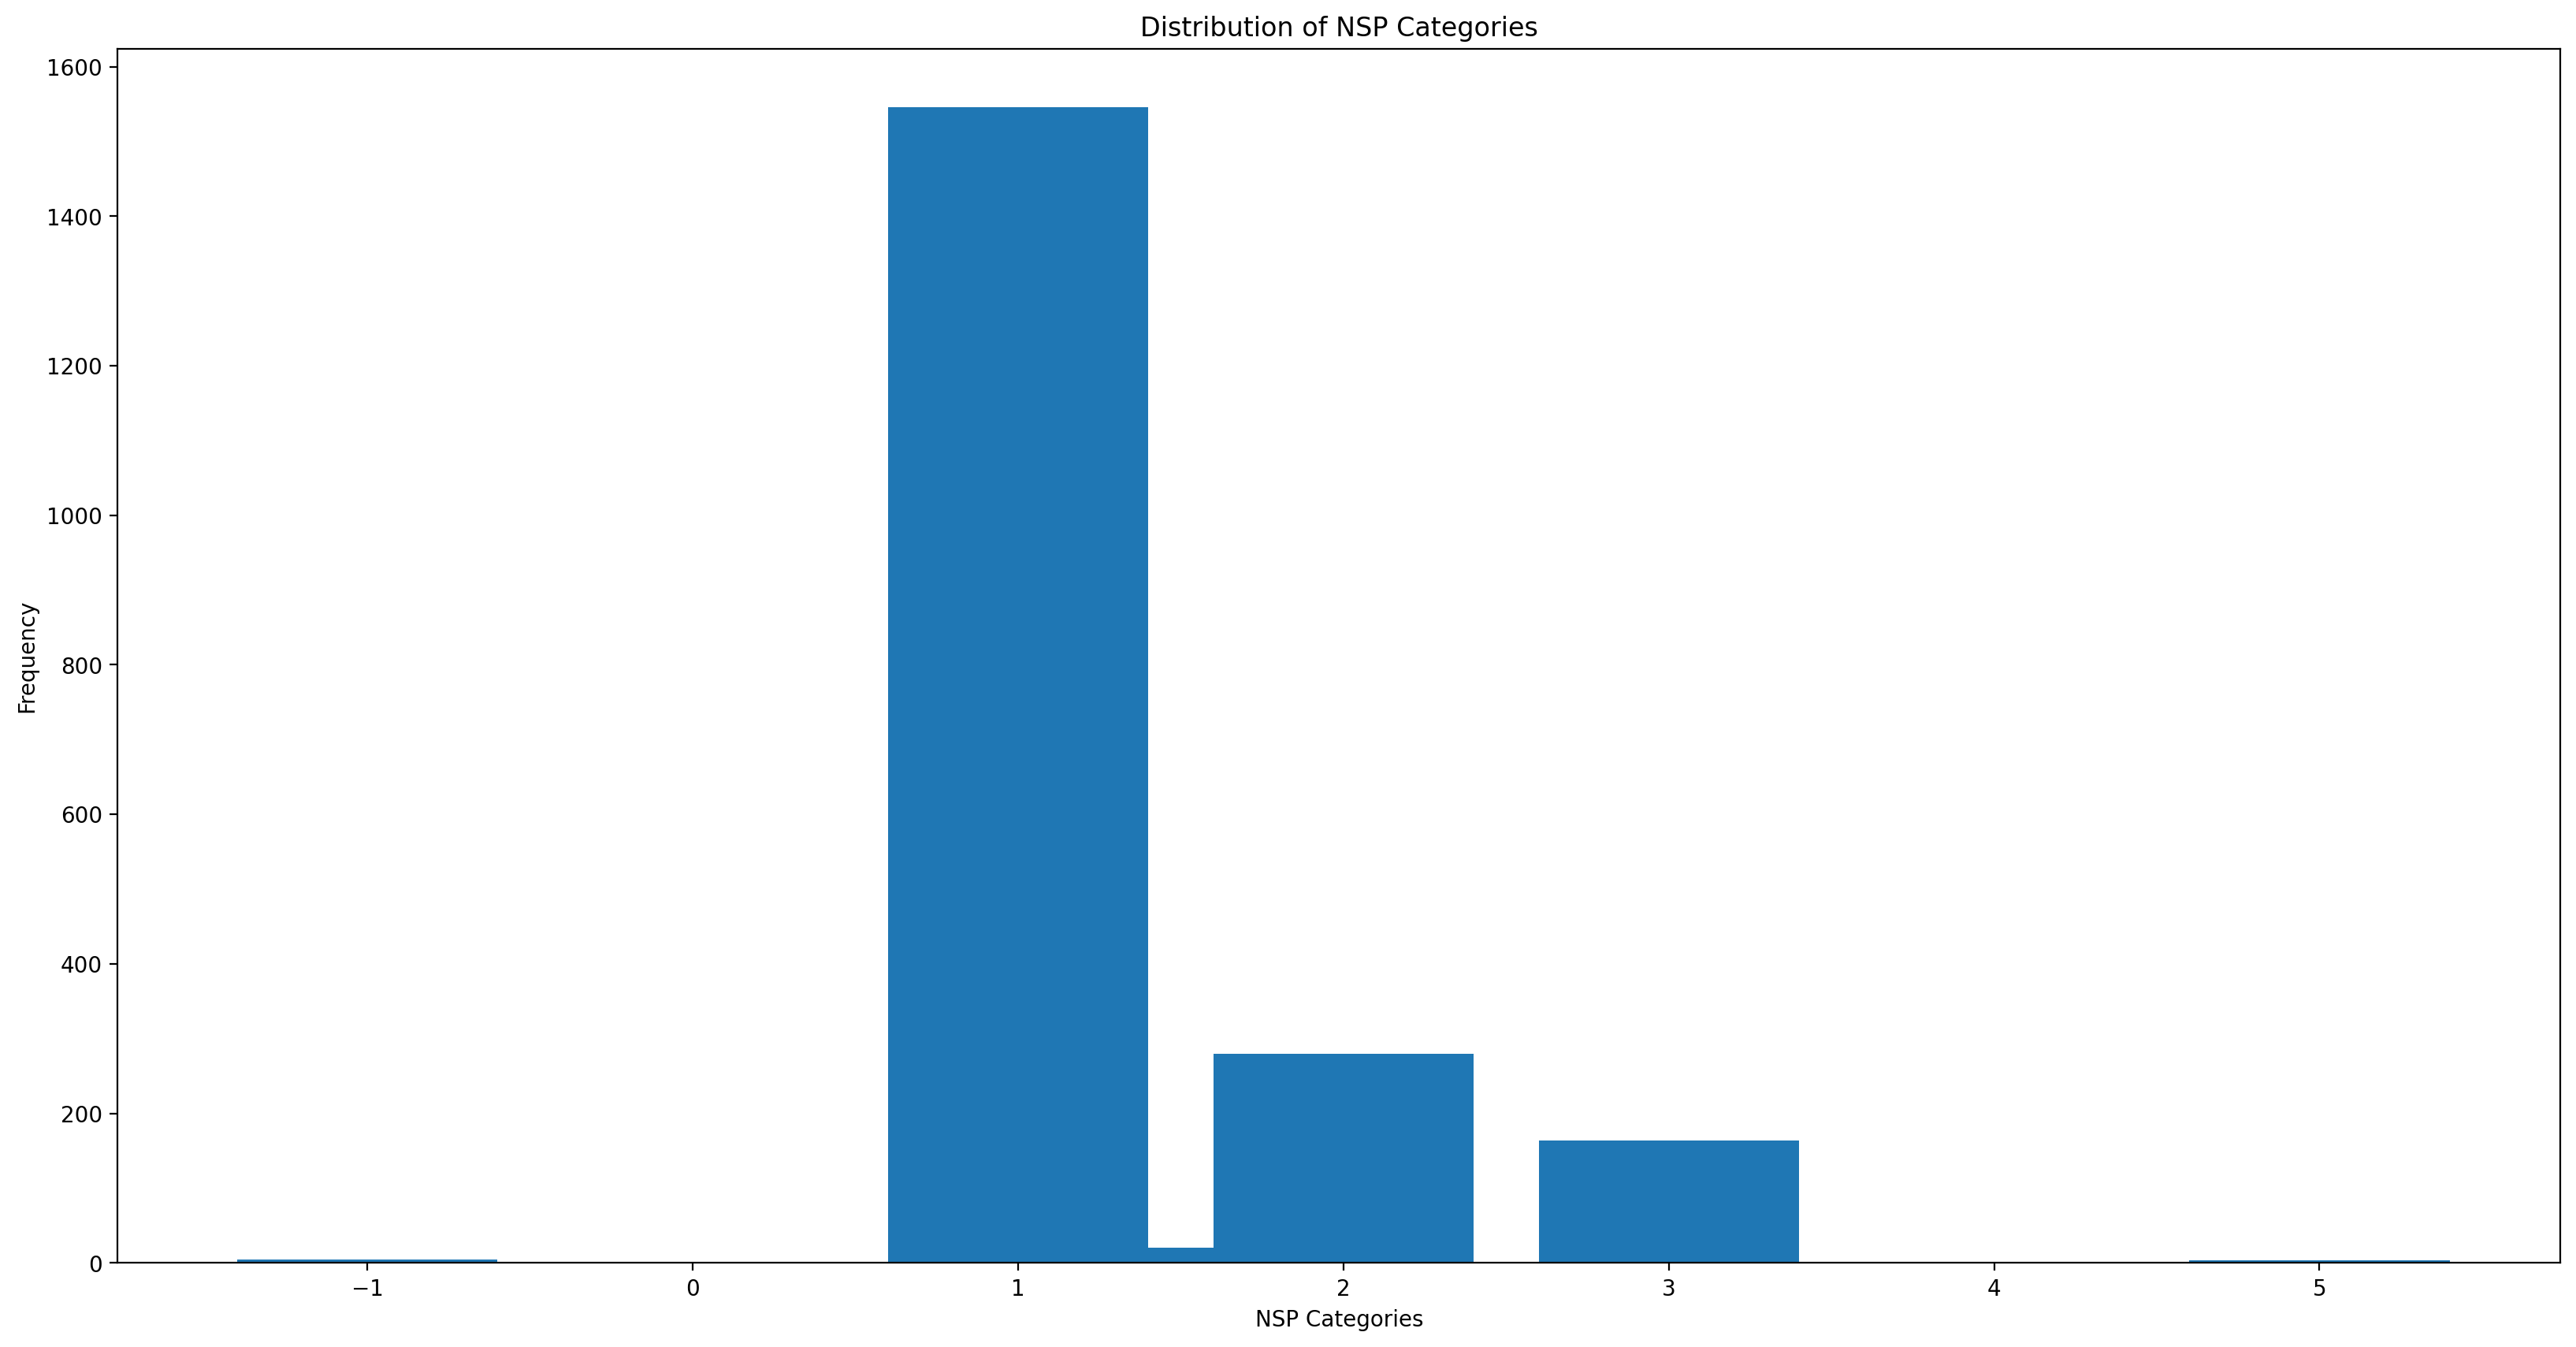

In [ ]:
nsp_values = df['NSP'].value_counts()

# Plotting the bar chart
plt.bar(nsp_values.index, nsp_values.values)
plt.xlabel('NSP Categories')
plt.ylabel('Frequency')
plt.title('Distribution of NSP Categories')
plt.show()

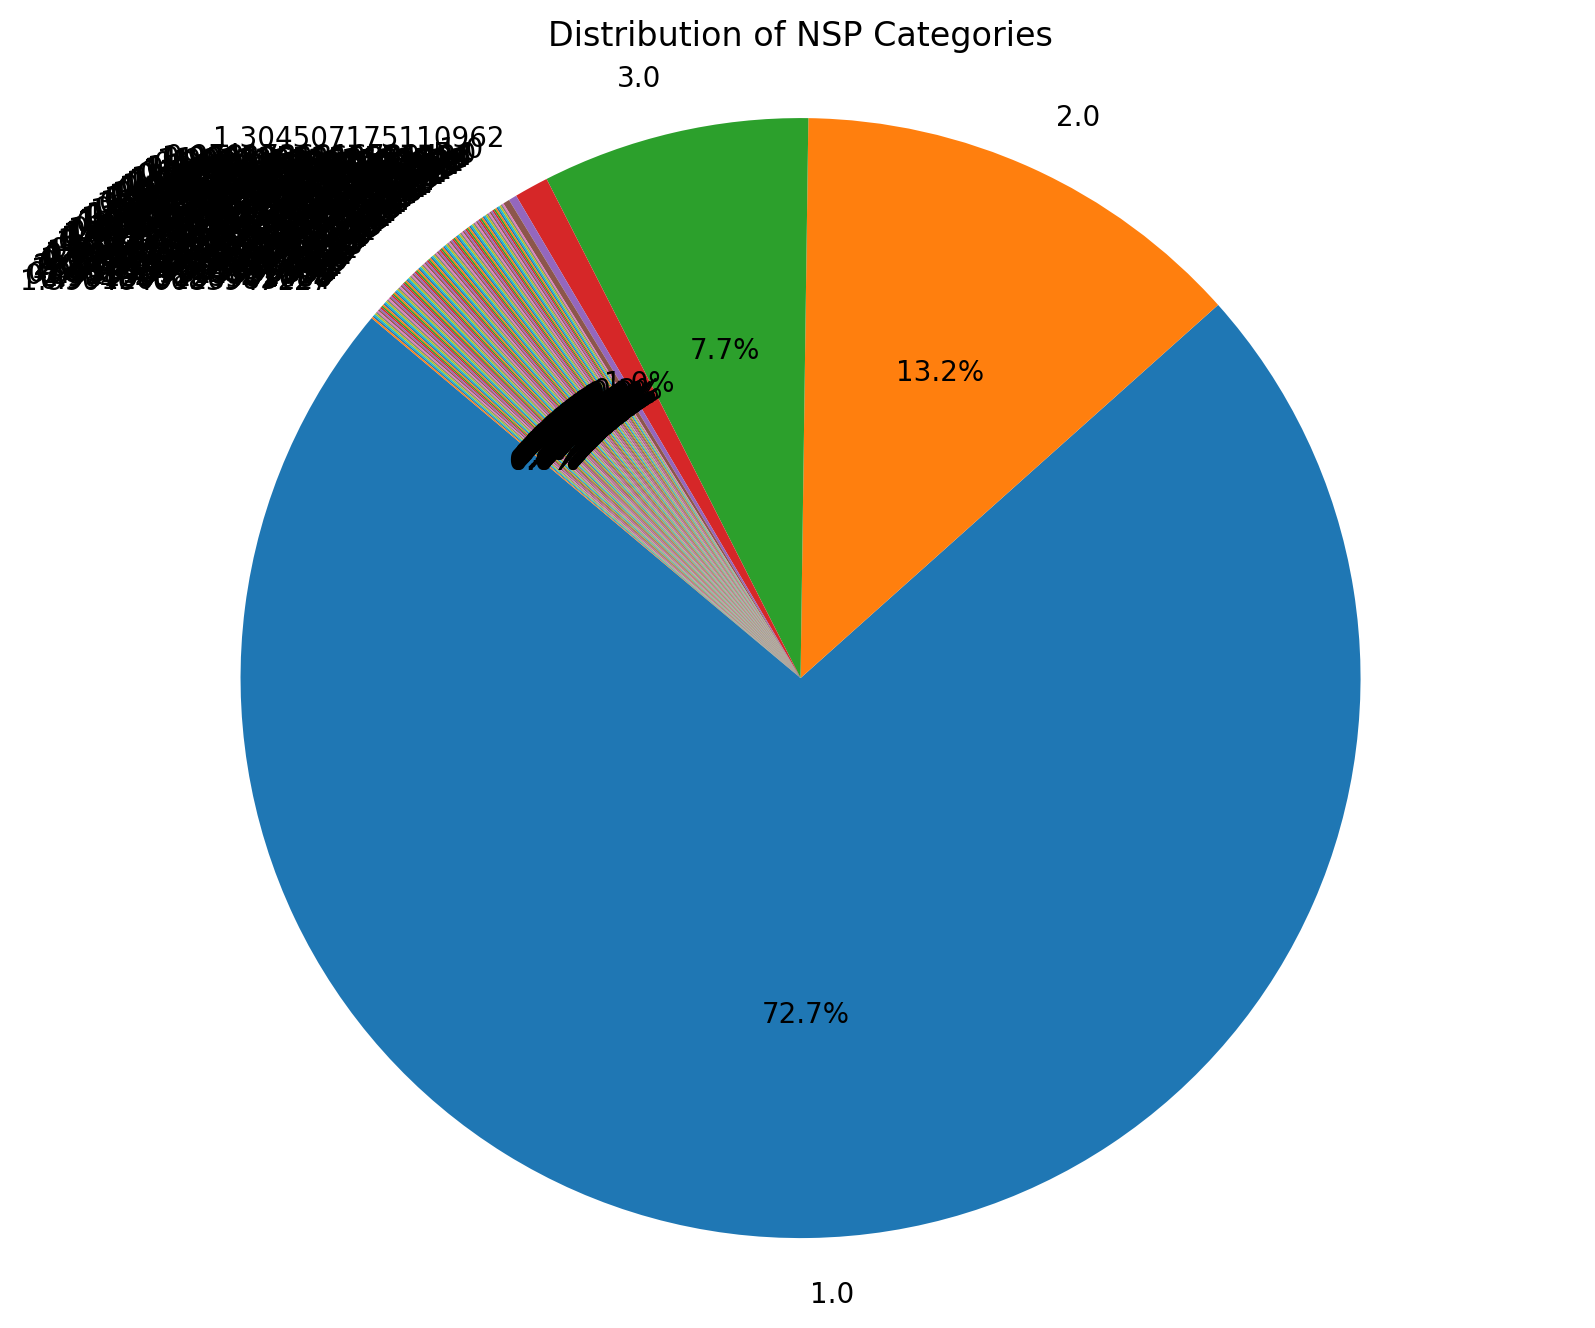

In [ ]:
category_counts = df['NSP'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of NSP Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

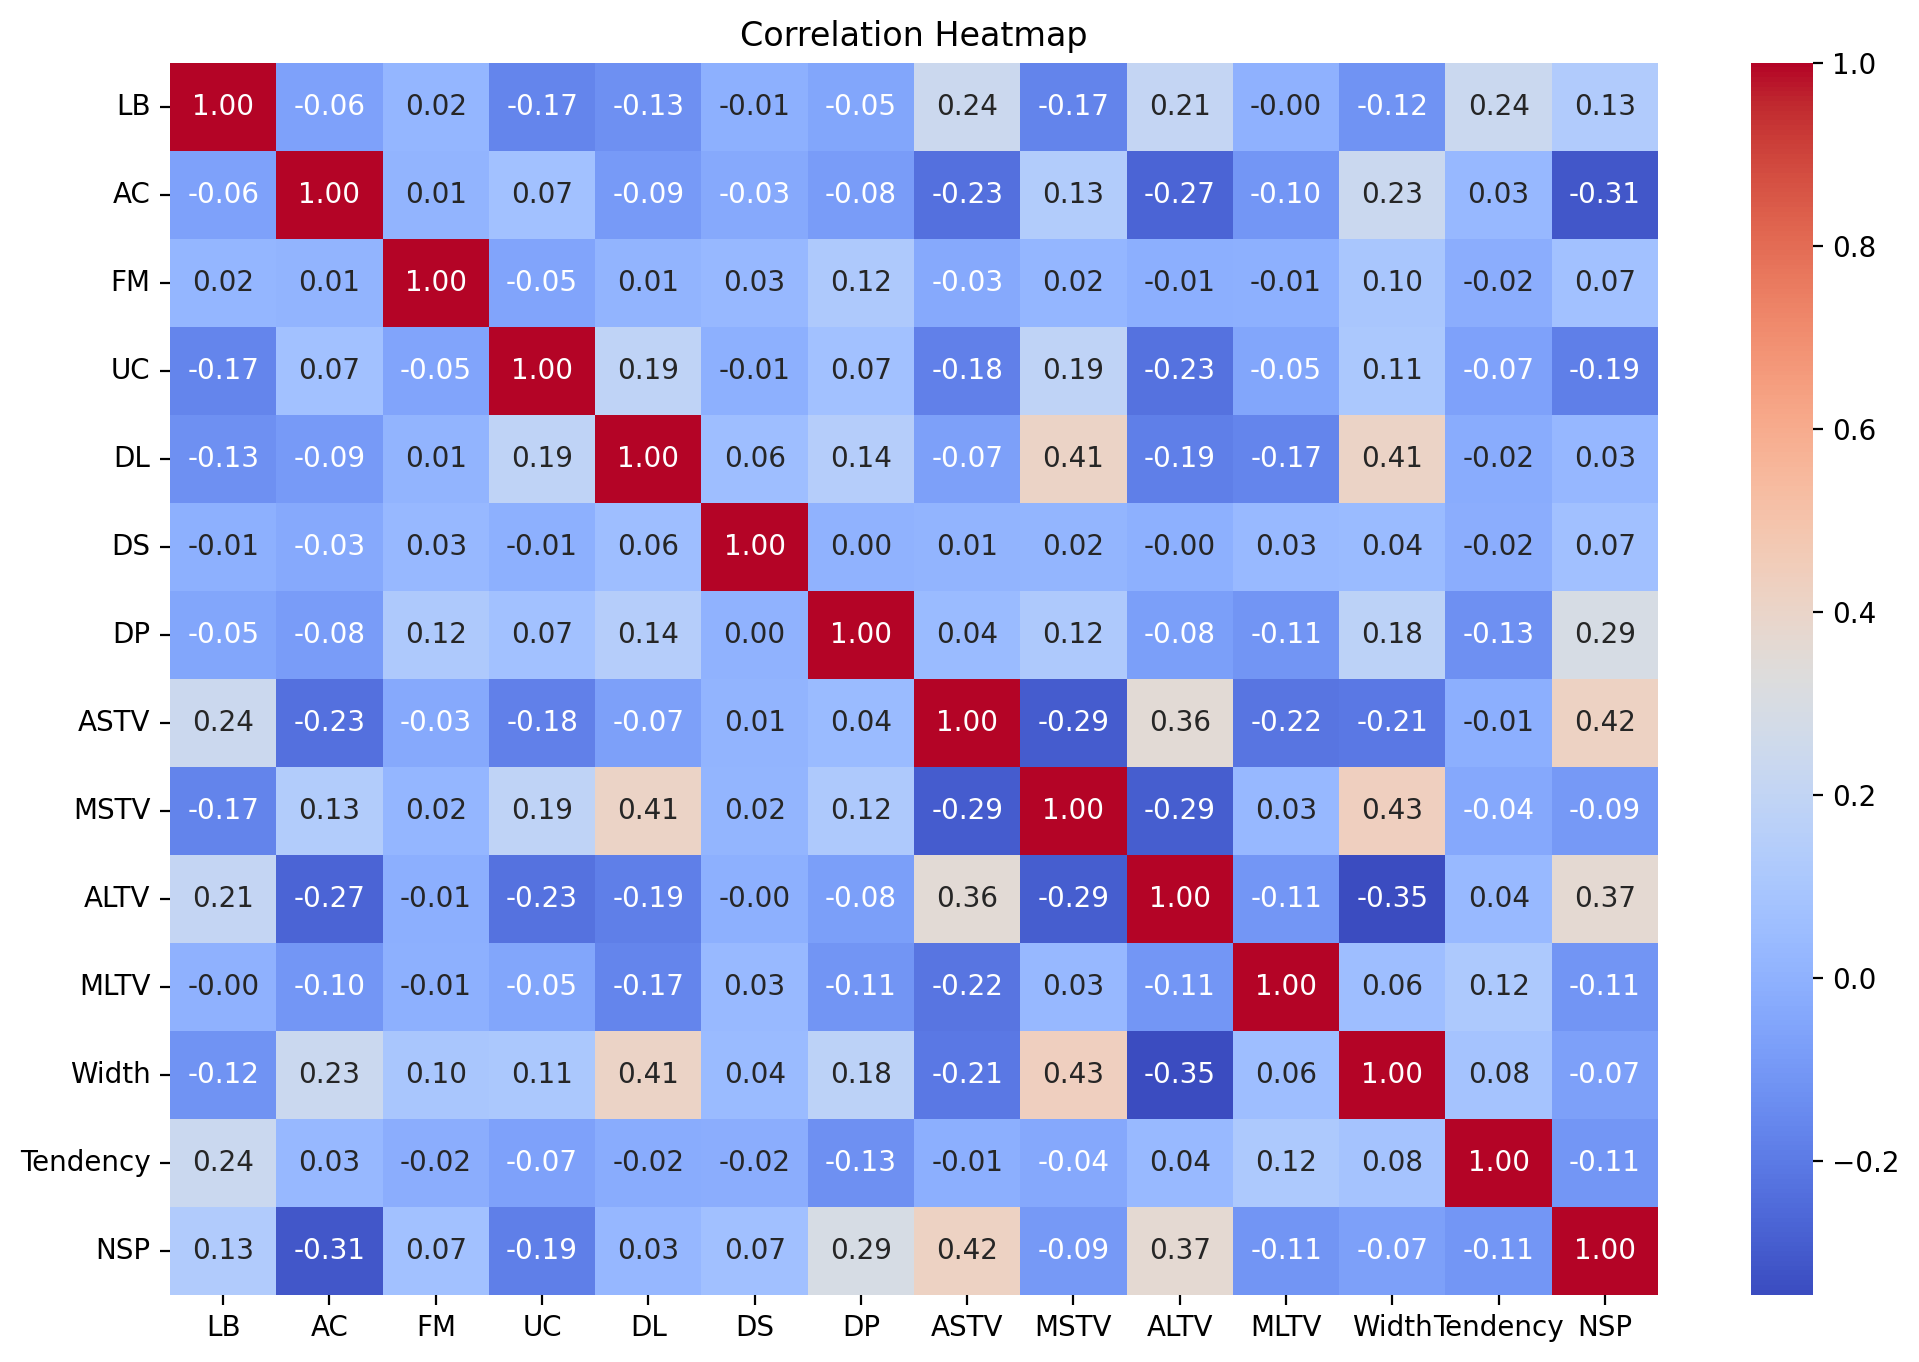

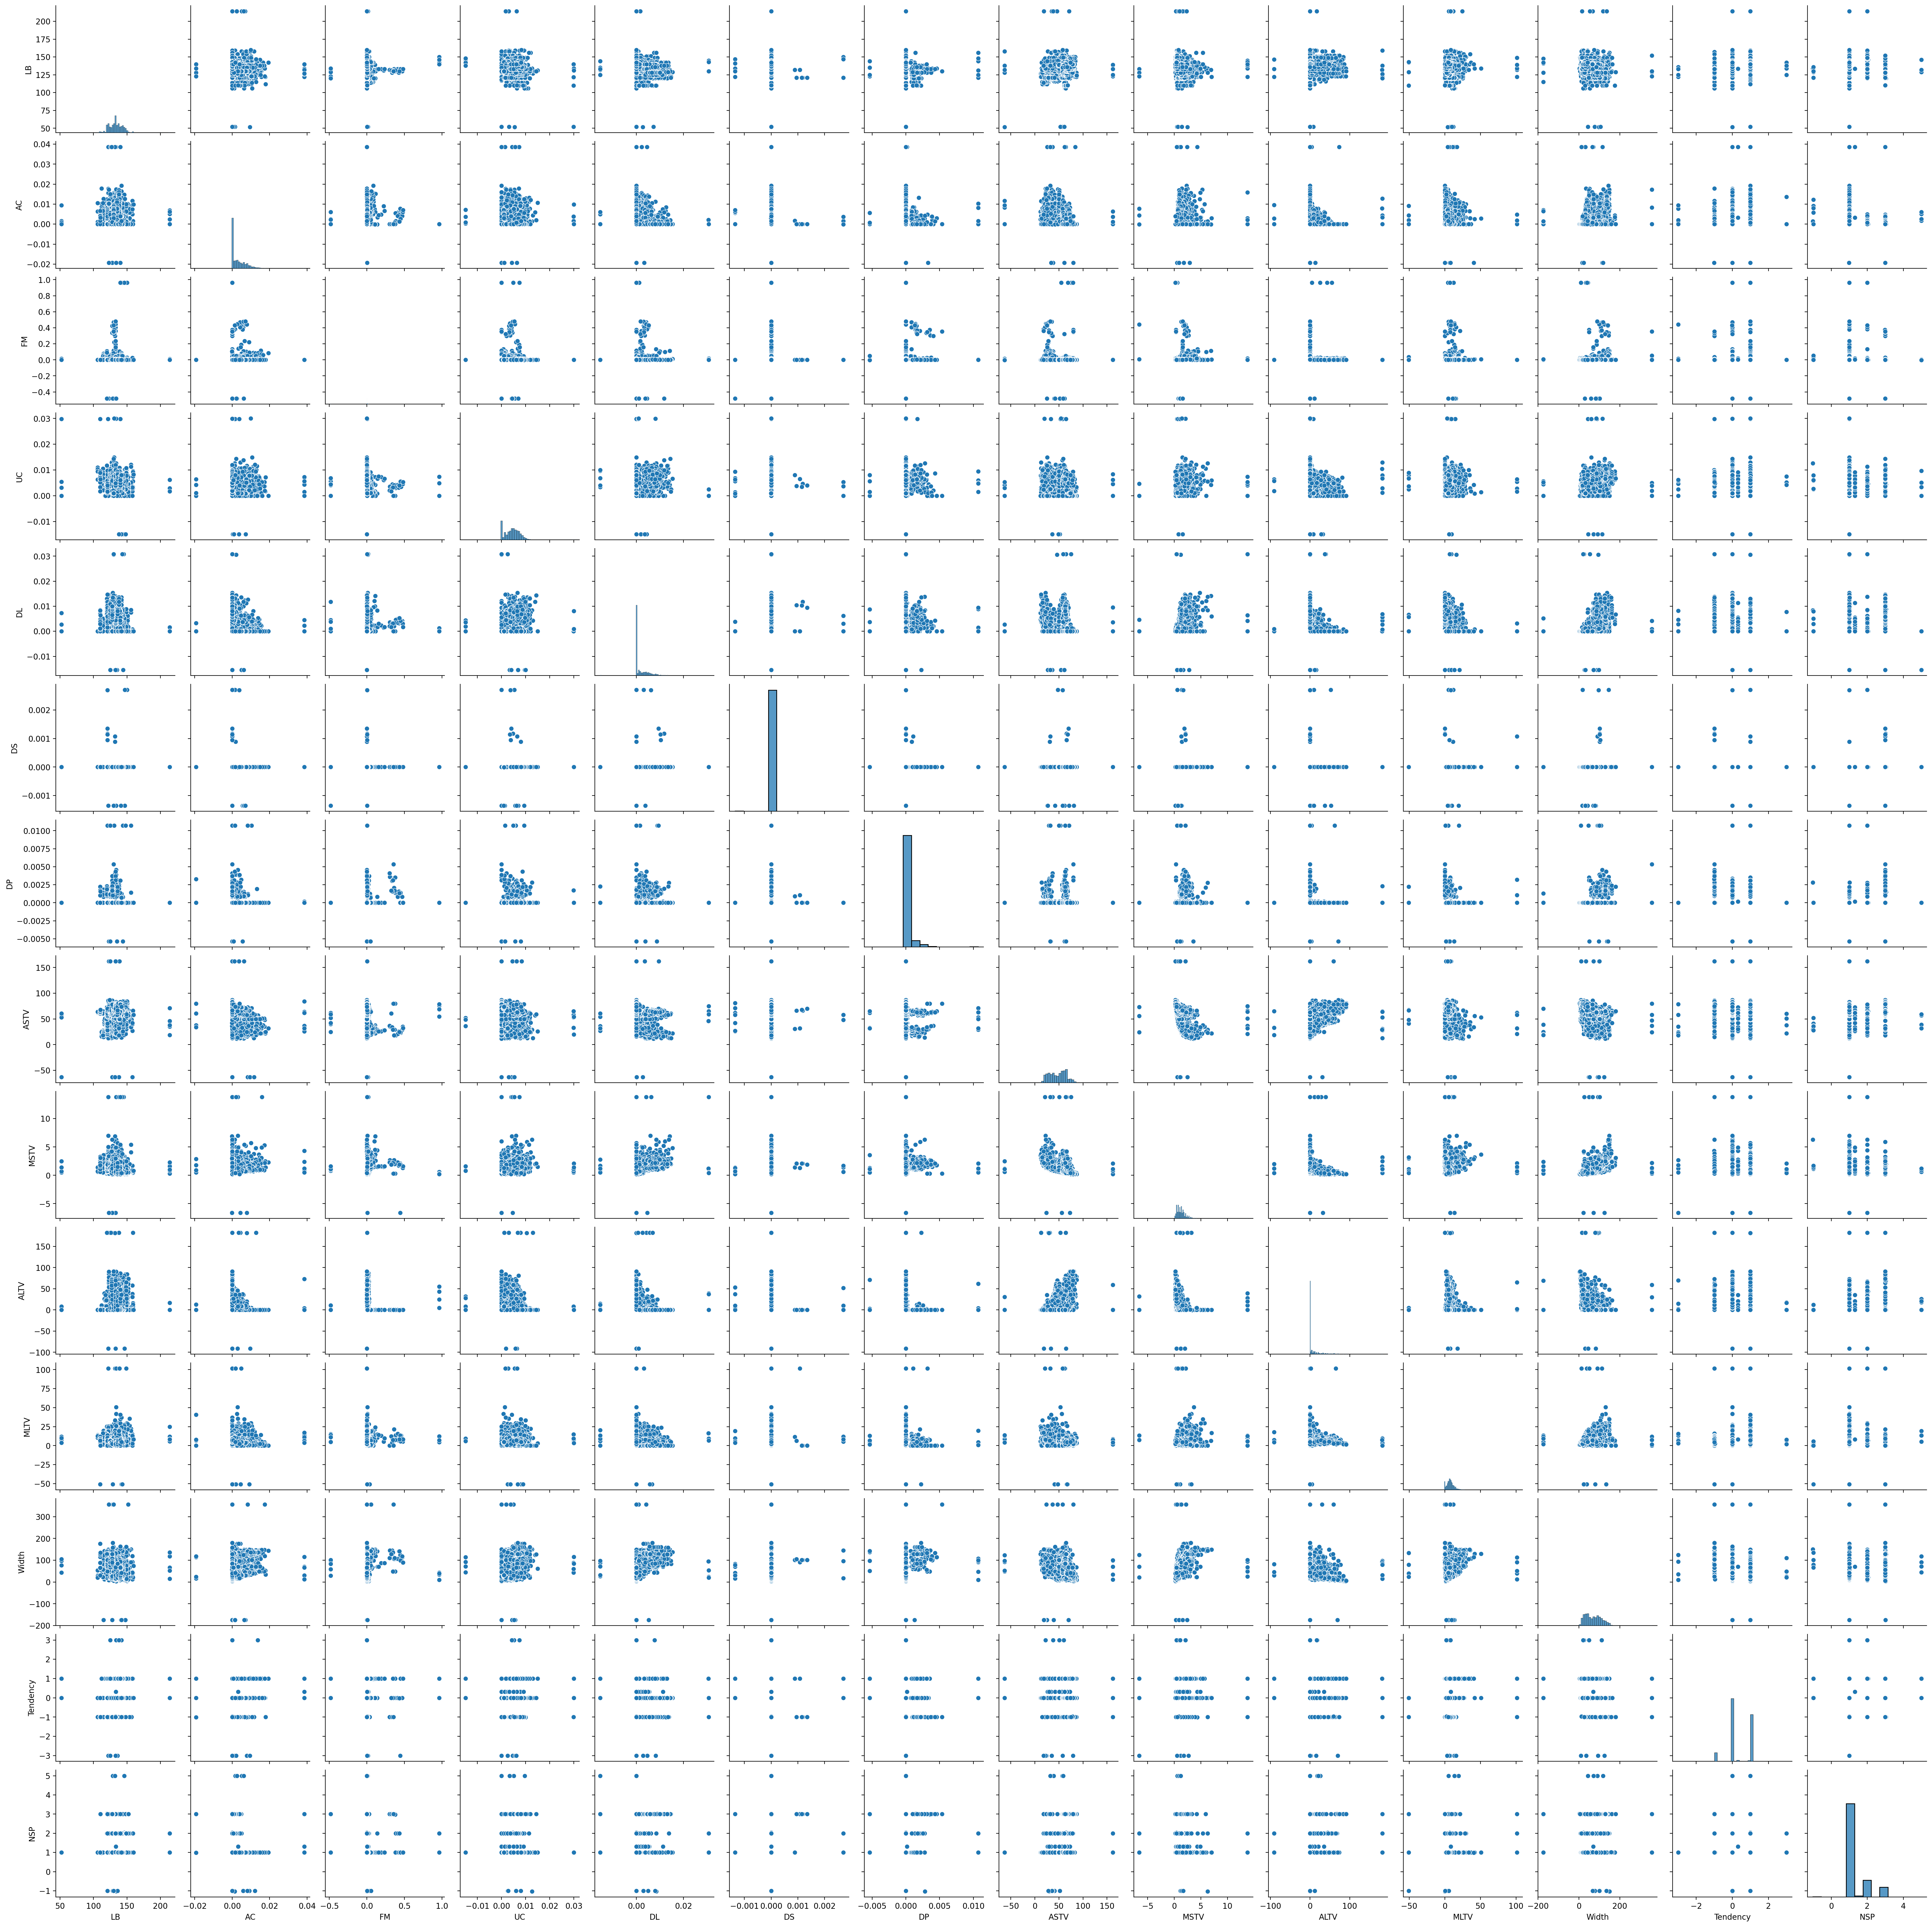

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Generate scatter plots for pairs of variables
sns.pairplot(df)
plt.show()

Text(0.5, 1.0, 'Violin Plot of NSP (Fetal State) vs LB (Fetal Heart Rate)')

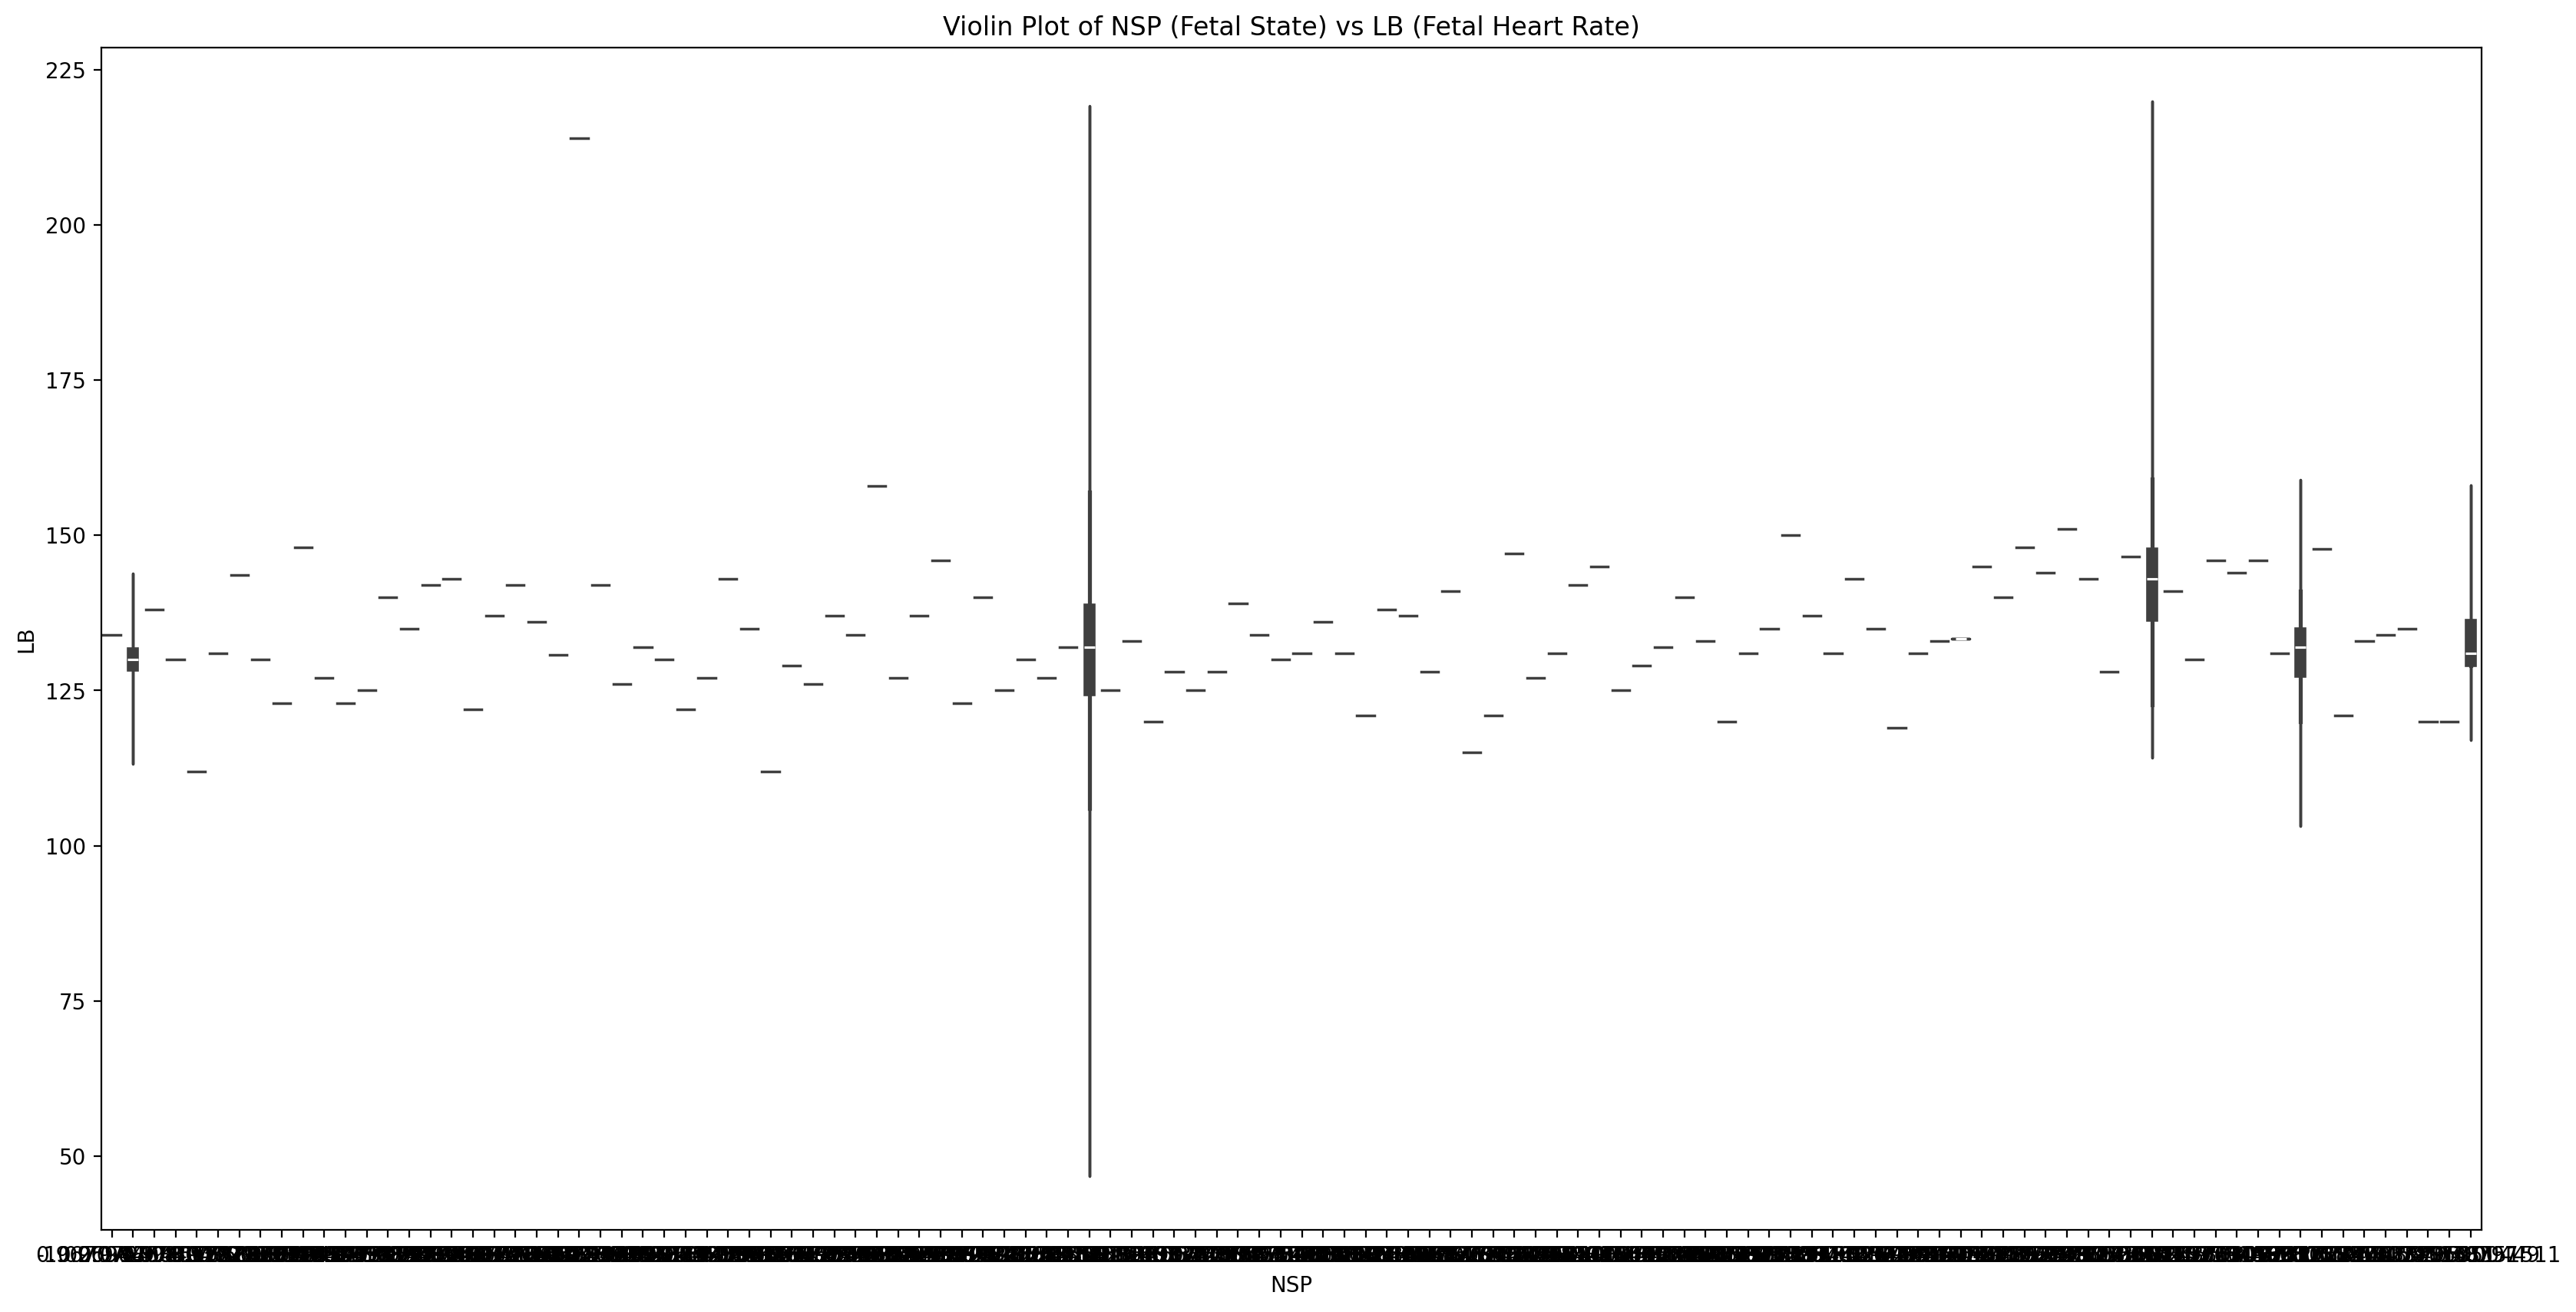

In [ ]:
sns.violinplot(x='NSP', y='LB', data=df)
plt.title('Violin Plot of NSP (Fetal State) vs LB (Fetal Heart Rate)')

**Fetal Heart Rate (LB) and Fetal State (NSP)**:

 There might be a correlation between LB and NSP since fetal heart rate variations are often indicative of fetal distress or well-being. A positive correlation would imply that as the fetal heart rate increases or decreases, the fetal state tends to change accordingly.

**Acceleration (AC) and Deceleration (DL):**

These variables are related to changes in the fetal heart rate. A negative correlation between AC and DL might suggest that as accelerations in heart rate increase, decelerations decrease, which could indicate fetal well-being. However, this would need further analysis to confirm.

**Uterine Contractions (UC) and Deceleration (DL):**

 A positive correlation here might imply that as uterine contractions increase, there are more frequent decelerations in fetal heart rate, indicating potential fetal distress.

**Width and Tendency:**

These variables seem to have a high negative correlation (-0.999926). This might indicate that as the width increases, the tendency decreases and vice versa. However, since this correlation is nearly -1, it could be an artifact or result of data manipulation, and it would be worth investigating the relationship between these variables more closely.

**NST and NSP:**


 There could be a correlation between the Non-Stress Test (NST) and Fetal State (NSP). A positive correlation would suggest that as the NST value increases, indicating a normal result, the fetal state tends to be more favorable.

**MSTV (Mean Short-Term Variability) and MLTV (Mean Long-Term Variability):**

These variables are measures of variability in fetal heart rate. A higher correlation between them would indicate consistency in variability measures, which might imply normal fetal autonomic nervous system function.

**Conclusion:**

**From the exploratory analysis using pair plots and violin plots, several key insights and patterns can be identified:**

**Correlation Patterns:**

 The pair plot reveals correlations between different variables. For instance, there seems to be a positive correlation between some variables like LB (fetal heart rate) and ASTV (percentage of time with abnormal short-term variability).

**Variable Distributions:**

 Violin plots provide insight into the distribution of the fetal state (NSP) across different levels of the fetal heart rate (LB). It appears that certain ranges of fetal heart rate are associated with specific fetal states.

**Outliers:**
The pair plot may reveal potential outliers or unusual data points, which could indicate measurement errors or anomalies in the data.

**Tendency Analysis:**
 The Tendency variable may show certain trends or patterns in the data, which could be further explored to understand their implications on fetal health.

**Variability:**

There seems to be variability in several features across different fetal states, as depicted by the violin plot.
These findings could impact decision-making or further analyses in several ways:

**Medical Diagnosis:**

Understanding the relationships between different fetal monitoring variables and fetal states could aid healthcare professionals in diagnosing fetal well-being during pregnancy and labor.

**Treatment:** Identifying patterns in fetal monitoring data could inform the development of personalized treatment strategies for pregnant individuals, improving maternal and fetal outcomes.

**Quality Control:**

Identifying outliers or unusual patterns in the data could prompt further investigation into data collection methods and quality control measures.

**Research:**

These findings could serve as a basis for further research into fetal monitoring techniques, potentially leading to advancements in obstetric care.






